In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score

df = pd.read_csv('pirvision_office_dataset1.csv')

## check check

In [15]:
missing_values = df.isnull().sum()
print(missing_values)

Date             0
Time             0
Label            0
Temperature_F    0
PIR_1            0
PIR_2            0
PIR_3            0
PIR_4            0
PIR_5            0
PIR_6            0
PIR_7            0
PIR_8            0
PIR_9            0
PIR_10           0
PIR_11           0
PIR_12           0
PIR_13           0
PIR_14           0
PIR_15           0
PIR_16           0
PIR_17           0
PIR_18           0
PIR_19           0
PIR_20           0
PIR_21           0
PIR_22           0
PIR_23           0
PIR_24           0
PIR_25           0
PIR_26           0
PIR_27           0
PIR_28           0
PIR_29           0
PIR_30           0
PIR_31           0
PIR_32           0
PIR_33           0
PIR_34           0
PIR_35           0
PIR_36           0
PIR_37           0
PIR_38           0
PIR_39           0
PIR_40           0
PIR_41           0
PIR_42           0
PIR_43           0
PIR_44           0
PIR_45           0
PIR_46           0
PIR_47           0
PIR_48           0
PIR_49      

In [17]:
df = df.dropna() 

In [18]:
duplicates = df.duplicated().sum()
print(f'Number of duplicate rows: {duplicates}')

Number of duplicate rows: 0


Using IQR for removing Outliers

In [19]:
# Function to remove outliers based on IQR method
def remove_outliers(df):
    # Select numeric columns
    numeric_columns = df.select_dtypes(include=[np.number]).columns

    # Iterate through numeric columns to remove outliers
    for column in numeric_columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define the upper and lower bounds to filter the outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers: filter the dataframe based on the bounds
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        
    return df

# Apply the function to your dataset
dataset_no_outliers = remove_outliers(df)

# Check the shape before and after removing outliers to verify
print(f"Original dataset shape: {df.shape}")
print(f"Dataset shape after removing outliers: {dataset_no_outliers.shape}")

Original dataset shape: (7651, 59)
Dataset shape after removing outliers: (5451, 59)


### Heatmap


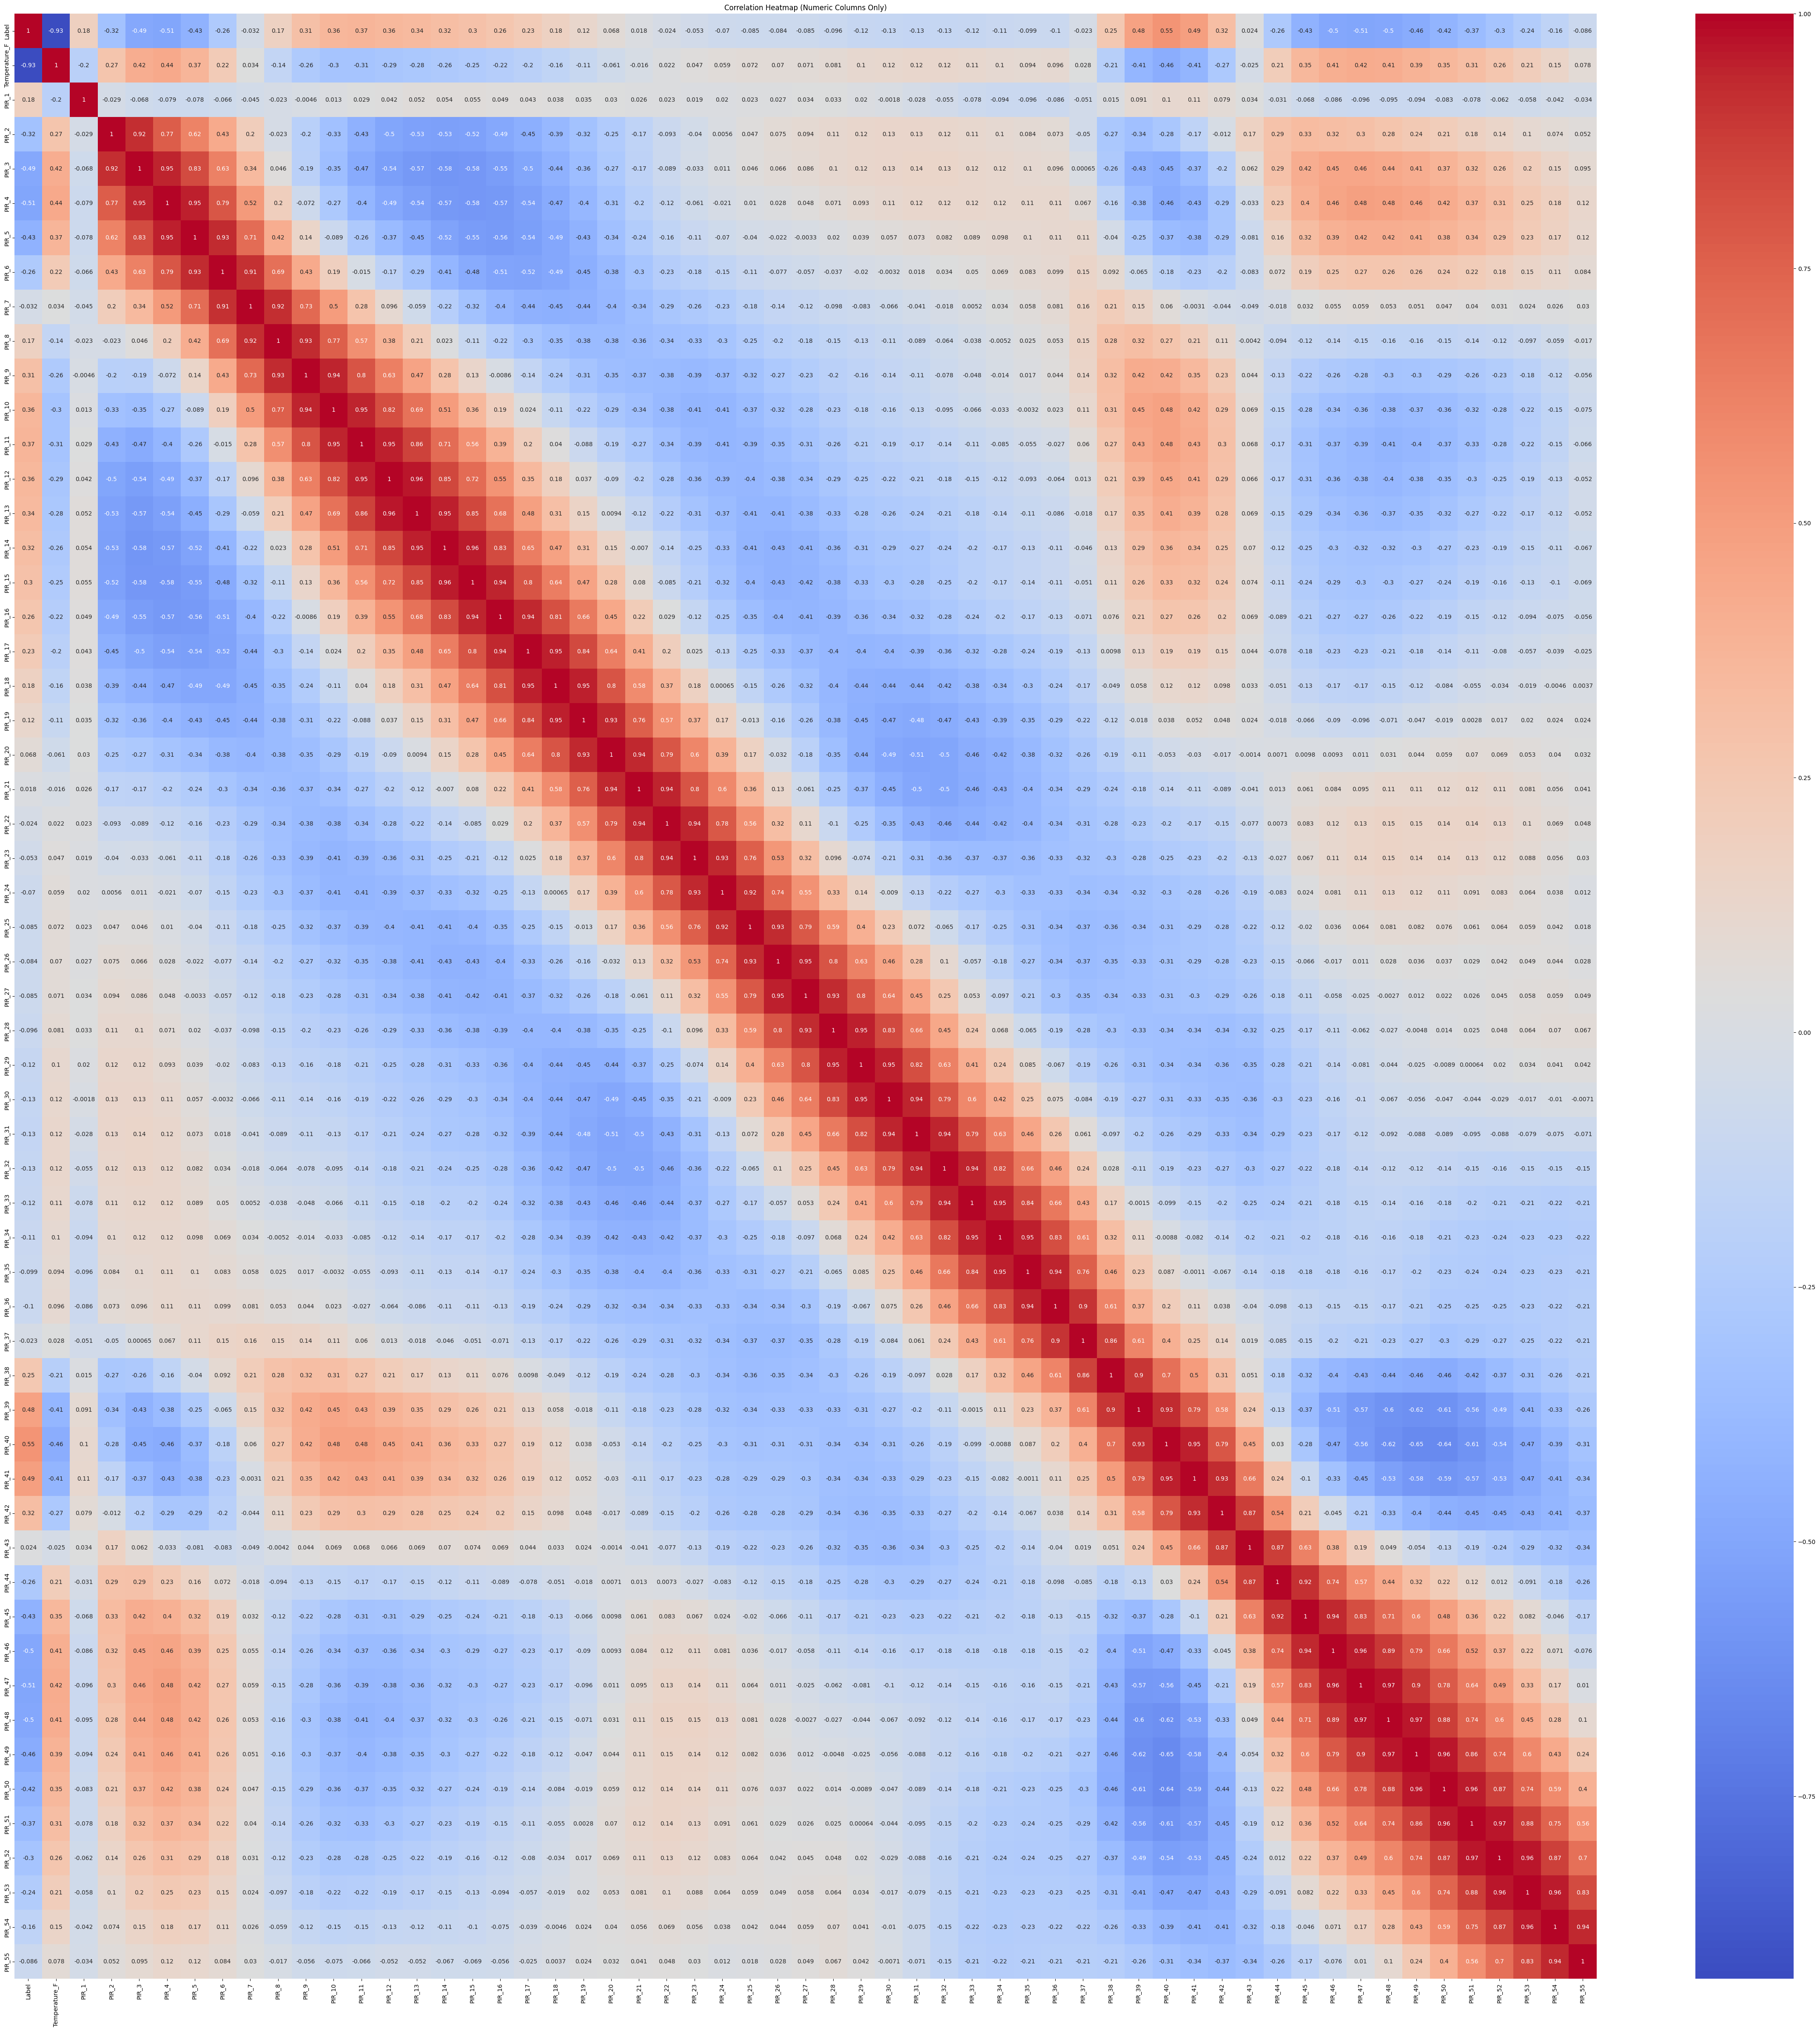

In [39]:
numeric_df = df.select_dtypes(include=['number'])

# Now safely plot the heatmap
plt.figure(figsize=(60,60))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()


### Split dataset into 70 ams 30 % 

In [ ]:
# Select features (all PIR sensors)
features = [f'PIR_{i}' for i in range(50, 56)]
X = df[features]

# Target variable
y = df['Temperature_F']

# Split into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Output shapes to confirm
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (5355, 6)
Testing set shape: (2296, 6)


### Linear Regression

In [43]:
# Initialize Linear Regression model
model = LinearRegression()

# Fit the model on training data
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression MAE: {mae}")
print(f"Linear Regression R² Score: {r2}")

Linear Regression MAE: 4.416753451554072e-14
Linear Regression R² Score: 1.0
